Romper Huevos


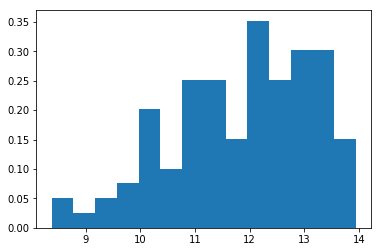

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from criticalpath import Node
%matplotlib inline

CANT_MUESTRAS= 1 # cantidad total de muestras a obtener
TAM_MUESTRA = 100 # tamaño de cada muestra.

GET_NOMBRE_TAREA = {
    1:ROMPER_HUEVOS['nombre'],
    2:REVOLVER_HUEVOS['nombre'],
    3:COCINAR_HUEVOS['nombre'],
    4:HACER_TOSTADAS['nombre'],
    5:TOSTADAS_MANTEQUILLA['nombre'],
    6:FREIR_TOCINO['nombre']
}

ROMPER_HUEVOS = {
    'id':1,
    'nombre':'Romper Huevos',
    'low':2,
    'high': 4,
    'tiempos':[],
    'predecesoras': []
}
REVOLVER_HUEVOS = {
    'id':2,
    'nombre':'Revolver Huevos',
    'low':3,
    'high': 6,
    'tiempos':[],
    'predecesoras': [1]
}
COCINAR_HUEVOS = {
    'id':3,
    'nombre':'Cocinar Huevos',
    'low':2,
    'high': 5,
    'tiempos':[],
    'predecesoras': [2]
}
HACER_TOSTADAS = {
    'id':4,
    'nombre':'Hacer Tostadas',
    'low':3,
    'high': 6,
    'tiempos':[],
    'predecesoras': []
}
TOSTADAS_MANTEQUILLA = {
    'id':5,
    'nombre':'Tostadas con Mantequilla',
    'low':2,
    'high': 6,
    'tiempos':[],
    'predecesoras': [4]
}

FREIR_TOCINO = {
    'id':6,
    'nombre':'Freir Tocino',
    'low':4,
    'high': 14,
    'tiempos':[],
    'predecesoras': []
}
TAREAS = [
    ROMPER_HUEVOS, REVOLVER_HUEVOS, COCINAR_HUEVOS, HACER_TOSTADAS, TOSTADAS_MANTEQUILLA, FREIR_TOCINO
]

# Cada tarea tiene lista de timpos. tiempo.length == corridas que siguen distribucion uniform
def generarTiempos(tareas, corridas):
    for tarea in tareas:
        tarea['tiempos'] = np.random.uniform(tarea['low'], tarea['high'], corridas) # [ini, fin)
        
# obtenemos ruta critica del proyecto con los tiempos previamente generados.

def getNodo(nodos, id_tarea):
    nodo = None
    for i in range(len(nodos)):
        if int(str(nodos[i])) == id_tarea:
            nodo = nodos[i]
            break
    return nodo       
    
def getDuracionRutaCritica(tareas, indice_tiempo):
    p = Node('project')
    nodos = []
    #creamos los nodos = Tareas
    for tarea in tareas:
        nodo = p.add(Node(tarea['id'], duration = tarea['tiempos'][indice_tiempo]))    
        nodos.append(nodo)
    #creamos los links = predecesoras
    for tarea in tareas:
        nodo_tarea = getNodo(nodos, tarea['id'])
        for id_predecesora in tarea['predecesoras']:
            nodo_tarea_predecesora = getNodo(nodos, id_predecesora)
            p.link(nodo_tarea_predecesora, nodo_tarea)
    p.update_all()
    #print p.get_critical_path()
    return p.duration

def getMuestraProyecto(tareas, tam_muestra):
    muestra_tiempos = []
    for i in range(tam_muestra):
        tiempo_un_proyecto = getDuracionRutaCritica(tareas, i)
        muestra_tiempos.append(tiempo_un_proyecto)
    #print "Muestreo de tiempos %s" % muestra_tiempos
    return muestra_tiempos

def getMuestras(tareas, cant_muestras, tam_muestra):
    muestras = []
    for i in range(cant_muestras):
        muestras.append(getMuestraProyecto(tareas, tam_muestra))
    return muestras

def graficar(arreglo_muestras):    
    plt.hist(arreglo_muestras[0], 14, normed=True)
    
if __name__ == '__main__':
    generarTiempos(TAREAS, CORRIDAS)
    muestras = getMuestras(TAREAS, CANT_MUESTRAS, TAM_MUESTRA) #muestras = [[muestra_1], [muestra_2]...[muestra_N]]
    graficar(muestras)

#plt.show()
